In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import os
import matplotlib.pyplot as plt
import PIL
import seaborn as sns
import plotly
import plotly.graph_objs as go
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from plotly.offline import iplot, init_notebook_mode
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from IPython.display import display
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler

In [2]:
from zipfile import ZipFile
retina = '/content/drive/MyDrive/train.zip'

with ZipFile(retina, 'r') as zip:
  zip.extractall()

In [3]:
os.listdir('./train')

['Mild', 'Severe', 'Moderate', 'No_DR', 'Proliferate_DR']

In [4]:
os.listdir(os.path.join('train', 'Mild'))

['365f8c01d994.png',
 '6165081b9021.png',
 'b4f41b5bf0ef.png',
 '5879285f9d8d.png',
 '677f087cd697.png',
 '35aa7f5c2ec0.png',
 '0eb52045349f.png',
 '494fc9c745a3.png',
 'd4f32b9c07df.png',
 '7ccb267fd394.png',
 'f0c13be90519.png',
 'd66b6f333dc7.png',
 'eeb231c3ef1f.png',
 '04ac765f91a1.png',
 'c102db7634d8.png',
 'ad3fc5076852.png',
 '194814669fee.png',
 'ef8109305128.png',
 '6298468d7d75.png',
 '80a02014b418.png',
 'c1e6fa1ad314.png',
 'a5a2a7003d60.png',
 'dd19428c3d29.png',
 '99132193eaa0.png',
 'f47a2a4a0411.png',
 '7005be54cab1.png',
 '4f7755e74a9e.png',
 '40e9b5630438.png',
 '82ac8463fadd.png',
 'd06ccd0cf4b8.png',
 '36677b70b1ef.png',
 '0369f3efe69b.png',
 '8114d6a160df.png',
 'af133a85ea0c.png',
 '531b39880c32.png',
 '1c3a6b4449e9.png',
 'd1cad012a254.png',
 '28f98cfe3858.png',
 'd801c0a66738.png',
 '71f6a6e4620a.png',
 '63a03880939c.png',
 'd85d052900b4.png',
 '5777ef74c9ec.png',
 '64eb5a79dfdd.png',
 '12ce6a1a1f31.png',
 '2a08ed6bbcbc.png',
 '27e4c800a449.png',
 '4661006f3ba

In [5]:
train = []
label = []

for i in os.listdir('./train'): #loop train directory
  train_class = os.listdir(os.path.join('train', i))
  for j in train_class: #loop through train directory classes
    img = os.path.join('train', i, j)
    train.append(img)
    label.append(i)

print('Number of train images = {}'.format(len(train)))


Number of train images = 3662


In [6]:
train

['train/Mild/365f8c01d994.png',
 'train/Mild/6165081b9021.png',
 'train/Mild/b4f41b5bf0ef.png',
 'train/Mild/5879285f9d8d.png',
 'train/Mild/677f087cd697.png',
 'train/Mild/35aa7f5c2ec0.png',
 'train/Mild/0eb52045349f.png',
 'train/Mild/494fc9c745a3.png',
 'train/Mild/d4f32b9c07df.png',
 'train/Mild/7ccb267fd394.png',
 'train/Mild/f0c13be90519.png',
 'train/Mild/d66b6f333dc7.png',
 'train/Mild/eeb231c3ef1f.png',
 'train/Mild/04ac765f91a1.png',
 'train/Mild/c102db7634d8.png',
 'train/Mild/ad3fc5076852.png',
 'train/Mild/194814669fee.png',
 'train/Mild/ef8109305128.png',
 'train/Mild/6298468d7d75.png',
 'train/Mild/80a02014b418.png',
 'train/Mild/c1e6fa1ad314.png',
 'train/Mild/a5a2a7003d60.png',
 'train/Mild/dd19428c3d29.png',
 'train/Mild/99132193eaa0.png',
 'train/Mild/f47a2a4a0411.png',
 'train/Mild/7005be54cab1.png',
 'train/Mild/4f7755e74a9e.png',
 'train/Mild/40e9b5630438.png',
 'train/Mild/82ac8463fadd.png',
 'train/Mild/d06ccd0cf4b8.png',
 'train/Mild/36677b70b1ef.png',
 'train/

<Axes: xlabel='count'>

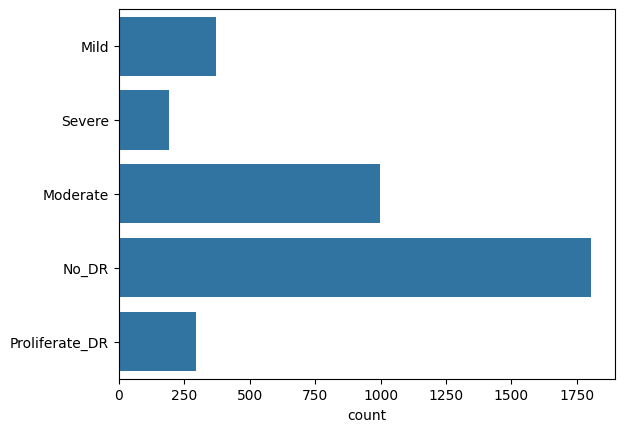

In [7]:
sns.countplot(label)

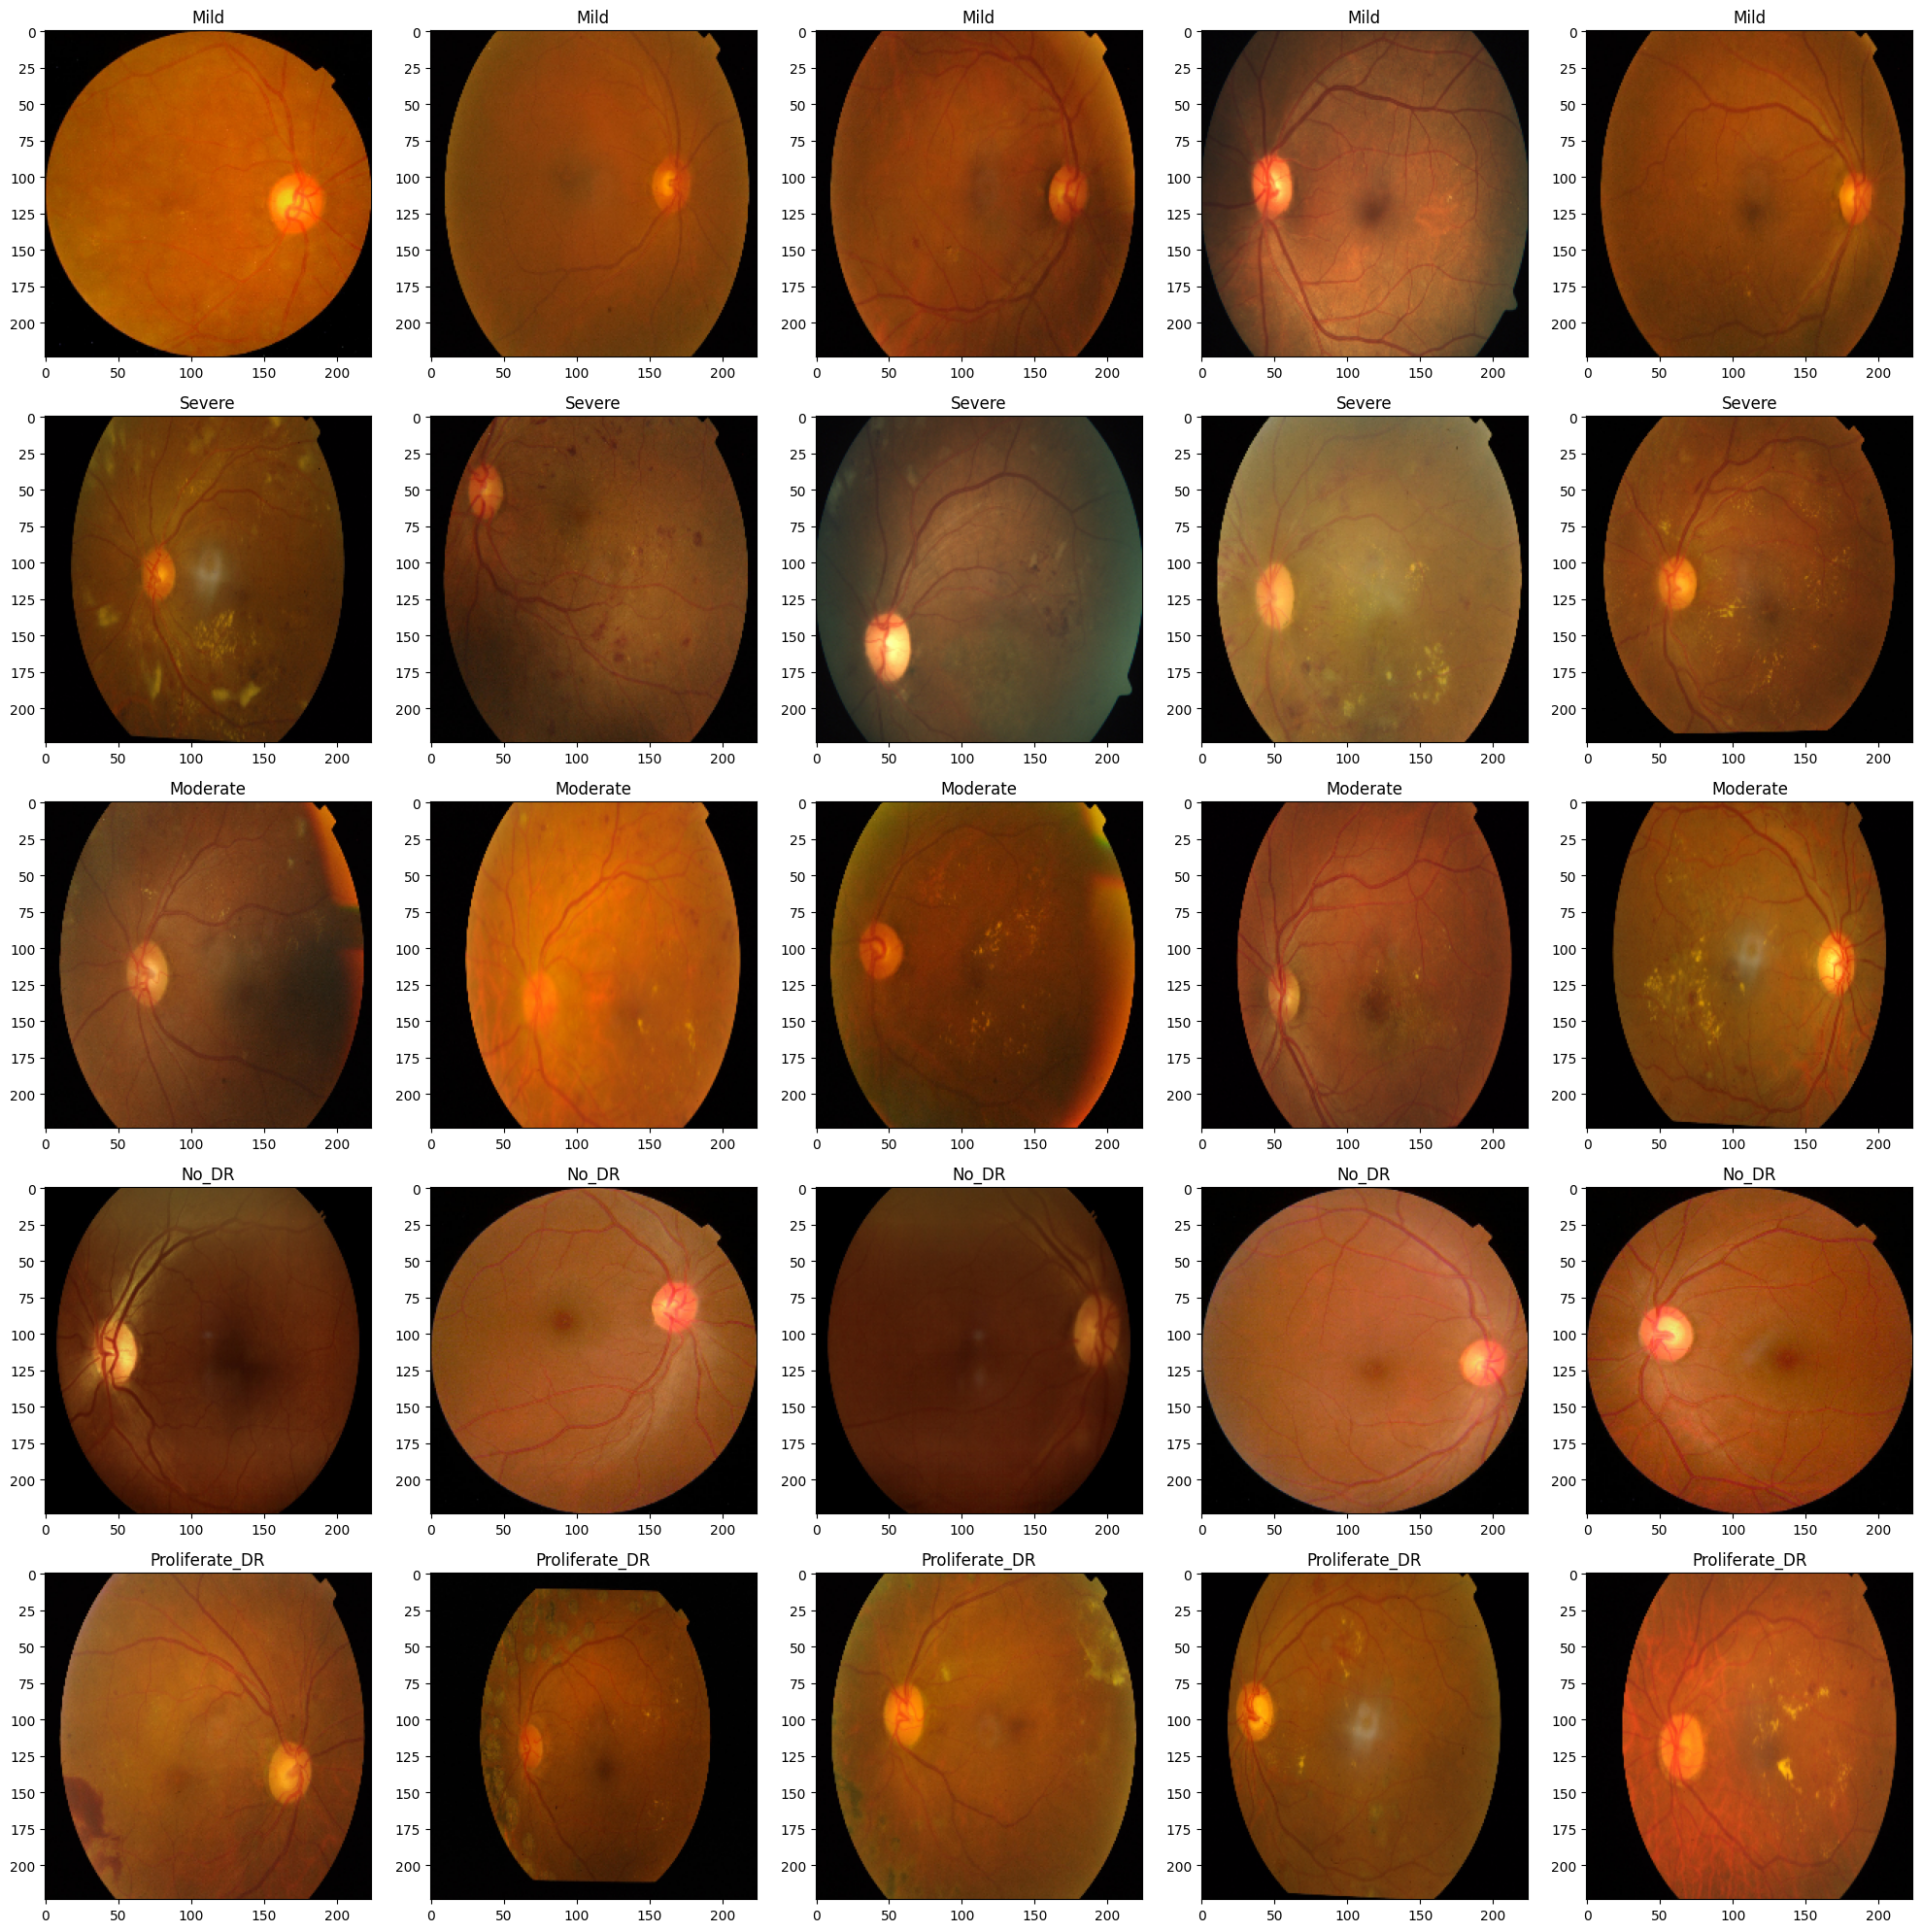

In [8]:
#visualize 5 images for each class in the dataset

fig, axs = plt.subplots(5,5, figsize =(20,20)) #grid of 5 classes
count = 0
for i in os.listdir('./train'):
  train_class = os.listdir(os.path.join('train', i)) #list of images in the class

  for j in range(5): #plot 5 images
    img = os.path.join('train', i, train_class[j])
    img = PIL.Image.open(img)
    axs[count][j].title.set_text(i)
    axs[count][j].imshow(img)

  count += 1

fig.tight_layout()

In [9]:
No_images_per_class = []
Class_name = []

for i in os.listdir('./train'):
  train_class = os.listdir(os.path.join('train', i))
  No_images_per_class.append(len(train_class))
  Class_name.append(i)
  print('Number of images in {} is {} \n'.format(i, len(train_class)))

Number of images in Mild is 370 

Number of images in Severe is 193 

Number of images in Moderate is 999 

Number of images in No_DR is 1805 

Number of images in Proliferate_DR is 295 



In [10]:
retina_df = pd.DataFrame({'Image': train, 'Labels': label})
retina_df

Image          Labels
0               train/Mild/365f8c01d994.png            Mild
1               train/Mild/6165081b9021.png            Mild
2               train/Mild/b4f41b5bf0ef.png            Mild
3               train/Mild/5879285f9d8d.png            Mild
4               train/Mild/677f087cd697.png            Mild
...                                     ...             ...
3657  train/Proliferate_DR/4462fba1d2a1.png  Proliferate_DR
3658  train/Proliferate_DR/cc3d2e961768.png  Proliferate_DR
3659  train/Proliferate_DR/c1799a6f5c65.png  Proliferate_DR
3660  train/Proliferate_DR/ba08cee68c71.png  Proliferate_DR
3661  train/Proliferate_DR/7c629b491d1a.png  Proliferate_DR

[3662 rows x 2 columns]

([<matplotlib.patches.Wedge at 0x7a11596b9900>,
 [Text(1.0450484856975153, 0.3433273402182392, 'Mild'),
  Text(0.7660528300242508, 0.7894067782910383, 'Severe'),
  Text(-0.2745093650146034, 1.0651969810881363, 'Moderate'),
  Text(-0.5117096250760684, -0.9737316157979619, 'No_DR'),
  Text(1.0649610805536351, -0.2754231234047608, 'Proliferate_DR')],
 [Text(0.5700264467440992, 0.1872694583008577, '10.1%'),
  Text(0.41784699819504584, 0.4305855154314754, '5.3%'),
  Text(-0.14973238091705637, 0.5810165351389833, '27.3%'),
  Text(-0.27911434095058274, -0.5311263358897973, '49.3%'),
  Text(0.5808878621201645, -0.15023079458441493, '8.1%')])

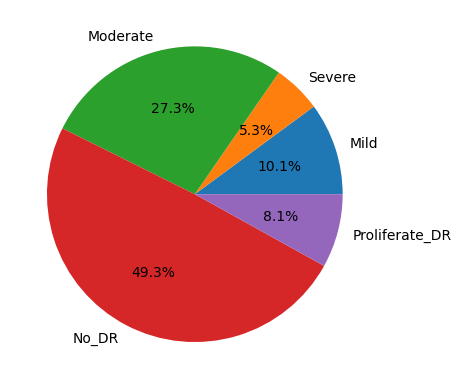

In [11]:
fig1, ax1 = plt.subplots()
ax1.pie(No_images_per_class, labels = Class_name, autopct = '%1.1f%%')

In [12]:
#shuffle df
retina_df = shuffle(retina_df)
train, test = train_test_split(retina_df, test_size=0.2)

In [13]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    vertical_flip = True,
    validation_split =0.15)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
train_generator = train_datagen.flow_from_dataframe(
    train,
    directory = './',
    x_col = 'Image',
    y_col='Labels',
    target_size = (256,256),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    subset = 'training')

validation_generator = train_datagen.flow_from_dataframe(
    train,
    directory = './',
    x_col = 'Image',
    y_col='Labels',
    target_size = (256,256),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32,
    subset = 'validation')

test_generator = train_datagen.flow_from_dataframe(
    test,
    directory = './',
    x_col = 'Image',
    y_col='Labels',
    target_size = (256,256),
    color_mode = 'rgb',
    class_mode = 'categorical',
    batch_size = 32)

Found 2490 validated image filenames belonging to 5 classes.
Found 439 validated image filenames belonging to 5 classes.
Found 733 validated image filenames belonging to 5 classes.


In [15]:
#RESNETS-> This is an architecture of CNN which reduces the vanishing gradient problem resulting from stacking up multiple layers
           #It trains multiple layers without vanishing gradient issues done by creating identity mappings
           #Introduces skip connection that feeds the input as is to a relu activation function

#RESNET BLOCKS
def res_block(X, filter, stage):

  #Convolutional block

  X_copy = X

  f1, f2, f3 = filter

  # Main Path

  X = Conv2D(f1, (1,1), strides = (1,1), name = 'res_'+str(stage)+'_conv_a', kernel_initializer = glorot_uniform(seed=0))(X)
  X = MaxPool2D((2,2))(X)
  X = BatchNormalization(axis=3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = Activation('relu')(X)

  #RESBLOCKS
  X = Conv2D(f2, kernel_size = (3,3), strides = (1,1), padding = 'same', name = 'res_'+str(stage)+'_conv_b', kernel_initializer = glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size=(1,1), strides = (1,1), name = 'res_'+str(stage)+'_conv_c', kernel_initializer = glorot_uniform(seed=0))(X)
  X = BatchNormalization(axis=3, name = 'bn_'+str(stage)+'_conv_c')(X)

  # Short path

  X_copy = Conv2D(f3, kernel_size=(1,1), strides = (1,1), name = 'res_'+str(stage)+'_conv_copy', kernel_initializer = glorot_uniform(seed=0))(X_copy)
  X_copy = MaxPool2D((2,2))(X_copy)
  X_copy = BatchNormalization(axis=3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)


  #ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)


  # IDENTITY BLOCKS
  X_copy = X

  # MAIN PATH

  X = Conv2D(f1, (1,1), strides = (1,1), name = 'res_'+str(stage)+'_identity_1_a', kernel_initializer = glorot_uniform (seed=0))(X)
  X = BatchNormalization(axis=3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = Activation('relu')(X)


  X = Conv2D(f2, kernel_size = (3,3), strides = (1,1), padding = 'same', name = 'res_'+str(stage)+'_identity_1_b', kernel_initializer = glorot_uniform (seed=0))(X)
  X = BatchNormalization(axis=3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size=(1,1), strides = (1,1), name = 'res_'+str(stage)+'_identity_1_c', kernel_initializer = glorot_uniform (seed=0))(X)
  X = BatchNormalization(axis=3, name = 'bn_'+str(stage)+'_identity_1_c')(X)


  #ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)

  #Identity Block 2

  X_copy = X

  # MAIN PATH

  X = Conv2D(f1, (1,1), strides = (1,1), name = 'res_'+str(stage)+'_identity_2_a', kernel_initializer = glorot_uniform (seed=0))(X)
  X = BatchNormalization(axis=3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = Activation('relu')(X)


  X = Conv2D(f2, kernel_size = (3,3), strides = (1,1), padding = 'same', name = 'res_'+str(stage)+'_identity_2_b', kernel_initializer = glorot_uniform (seed=0))(X)
  X = BatchNormalization(axis=3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = Activation('relu')(X)

  X = Conv2D(f3, kernel_size=(1,1), strides = (1,1), name = 'res_'+str(stage)+'_identity_2_c', kernel_initializer = glorot_uniform (seed=0))(X)
  X = BatchNormalization(axis=3, name = 'bn_'+str(stage)+'_identity_2_c')(X)


  #ADD
  X = Add()([X,X_copy])
  X = Activation('relu')(X)


  return X






In [16]:
#RESNET MODEL

input_shape = (256,256,3)

# Input tensor shape

X_input = Input(input_shape)

#Zero padding

X = ZeroPadding2D((3,3))(X_input)

#1 -stage

X = Conv2D(64, (7,7), strides=(2,2), name = 'conv1', kernel_initializer = glorot_uniform(seed = 0))(X)
X = BatchNormalization(axis=3, name = 'bn_conv1')(X)
X = Activation('relu')(X)
X = MaxPooling2D((3,3), strides = (2,2))(X)

# 2 -stage

X= res_block(X, filter = [64, 64, 256], stage=2)

# 3 -stage

X= res_block(X, filter = [128,128,512], stage=3)

# 4 -stage

X= res_block(X, filter = [256,256,1024], stage= 4)



#Average Pooling

X = AveragePooling2D((2,2), name="Average_Pooling")(X)

#Final layer

X =  Flatten()(X)
X = Dense(5, activation = 'softmax', name='Dense_final', kernel_initializer = glorot_uniform(seed=0))(X)


model = Model( inputs = X_input, outputs = X, name = 'Resnet18')

model.summary

<bound method Model.summary of <keras.src.engine.functional.Functional object at 0x7a1158061810>>

In [20]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [21]:
# using early stopping to exit training if validation loss is not decreasing even after certain epochs

earlystopping = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=15)

#save the best model with lower validation loss
checkpointer = ModelCheckpoint(filepath='my_model.h5', verbose = 1, save_best_only=True)

In [22]:
history = model.fit(train_generator, steps_per_epoch = train_generator.n // 32, epochs = 20, validation_data=validation_generator, validation_steps=validation_generator.n // 32, callbacks=[checkpointer, earlystopping])

Epoch 1/20
77/77 [==============================] - ETA: 0s - loss: 1.0918 - accuracy: 0.6570
Epoch 1: val_loss improved from inf to 1.59015, saving model to my_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



77/77 [==============================] - 70s 685ms/step - loss: 1.0918 - accuracy: 0.6570 - val_loss: 1.5902 - val_accuracy: 0.2933
Epoch 2/20
77/77 [==============================] - ETA: 0s - loss: 0.8472 - accuracy: 0.7050
Epoch 2: val_loss did not improve from 1.59015
77/77 [==============================] - 52s 682ms/step - loss: 0.8472 - accuracy: 0.7050 - val_loss: 1.6520 - val_accuracy: 0.2957
Epoch 3/20
77/77 [==============================] - ETA: 0s - loss: 0.7877 - accuracy: 0.7181
Epoch 3: val_loss did not improve from 1.59015
77/77 [==============================] - 51s 664ms/step - loss: 0.7877 - accuracy: 0.7181 - val_loss: 1.6483 - val_accuracy: 0.3005
Epoch 4/20
77/77 [==============================] - ETA: 0s - loss: 0.7540 - accuracy: 0.7327
Epoch 4: val_loss improved from 1.59015 to 1.42316, saving model to my_model.h5
77/77 [==============================] - 48s 621ms/step - loss: 0.7540 - accuracy: 0.7327 - val_loss: 1.4232 - val_accuracy: 0.3630
Epoch 5/20
77/77

In [23]:
model.load_weights('my_model.h5')
evaluate = model.evaluate(test_generator, steps = test_generator.n //32, verbose = 1)

print('Accuracy Test : {}'.format(evaluate[1]))

22/22 [==============================] - 11s 523ms/step - loss: 0.6119 - accuracy: 0.7841
Accuracy Test : 0.7840909361839294


In [24]:
labels = {0: 'Mild', 1:'Moderate', 2: 'No_DR', 3:'Proliferate_DR', 4:'Severe'}

In [25]:
#Load images and their predictions

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import cv2

prediction = []
original = []
image = []
count = 0

for item in range(len(test)):
  img = PIL.Image.open(test['Image'].tolist()[item])
  img = img.resize((256,256))
  image.append(img)
  img = np.asarray(img, dtype=np.float32)
  img = img /255
  img = img.reshape(-1,256, 256, 3)
  predict = model.predict(img)
  predict = np.argmax(predict)
  prediction.append(labels[predict])
  original.append(test['Labels'].tolist()[item])




1/1 [==============================] - 0s 23ms/step


In [26]:
score = accuracy_score(original, prediction)
print("Test Accuracy: {}".format(score))

Test Accuracy: 0.7871759890859482


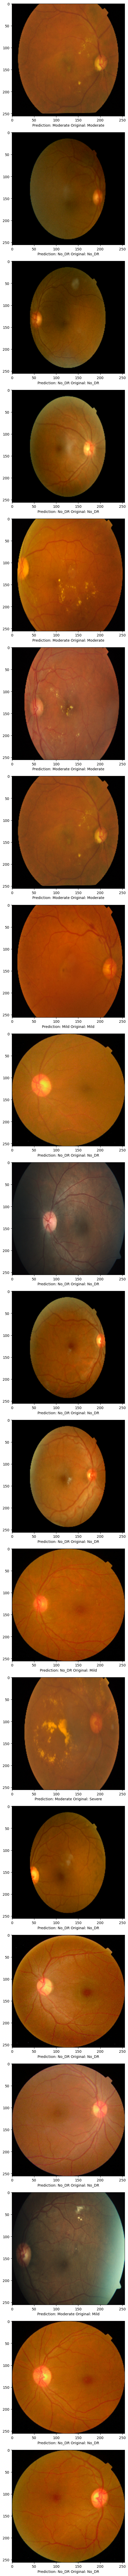

In [28]:
#print 20 images and label the prediction along with the original
import random
fig = plt.figure(figsize = (100,100))
for i in range (20):
  j = random.randint(0, len(image))
  fig.add_subplot(20, 1, i+1)
  plt.xlabel("Prediction: "+ prediction[j]+" Original: "+original[j])
  plt.imshow(image[j])

fig.tight_layout()
plt.show()

Text(0.5, 1.0, 'Confusion_matrix')

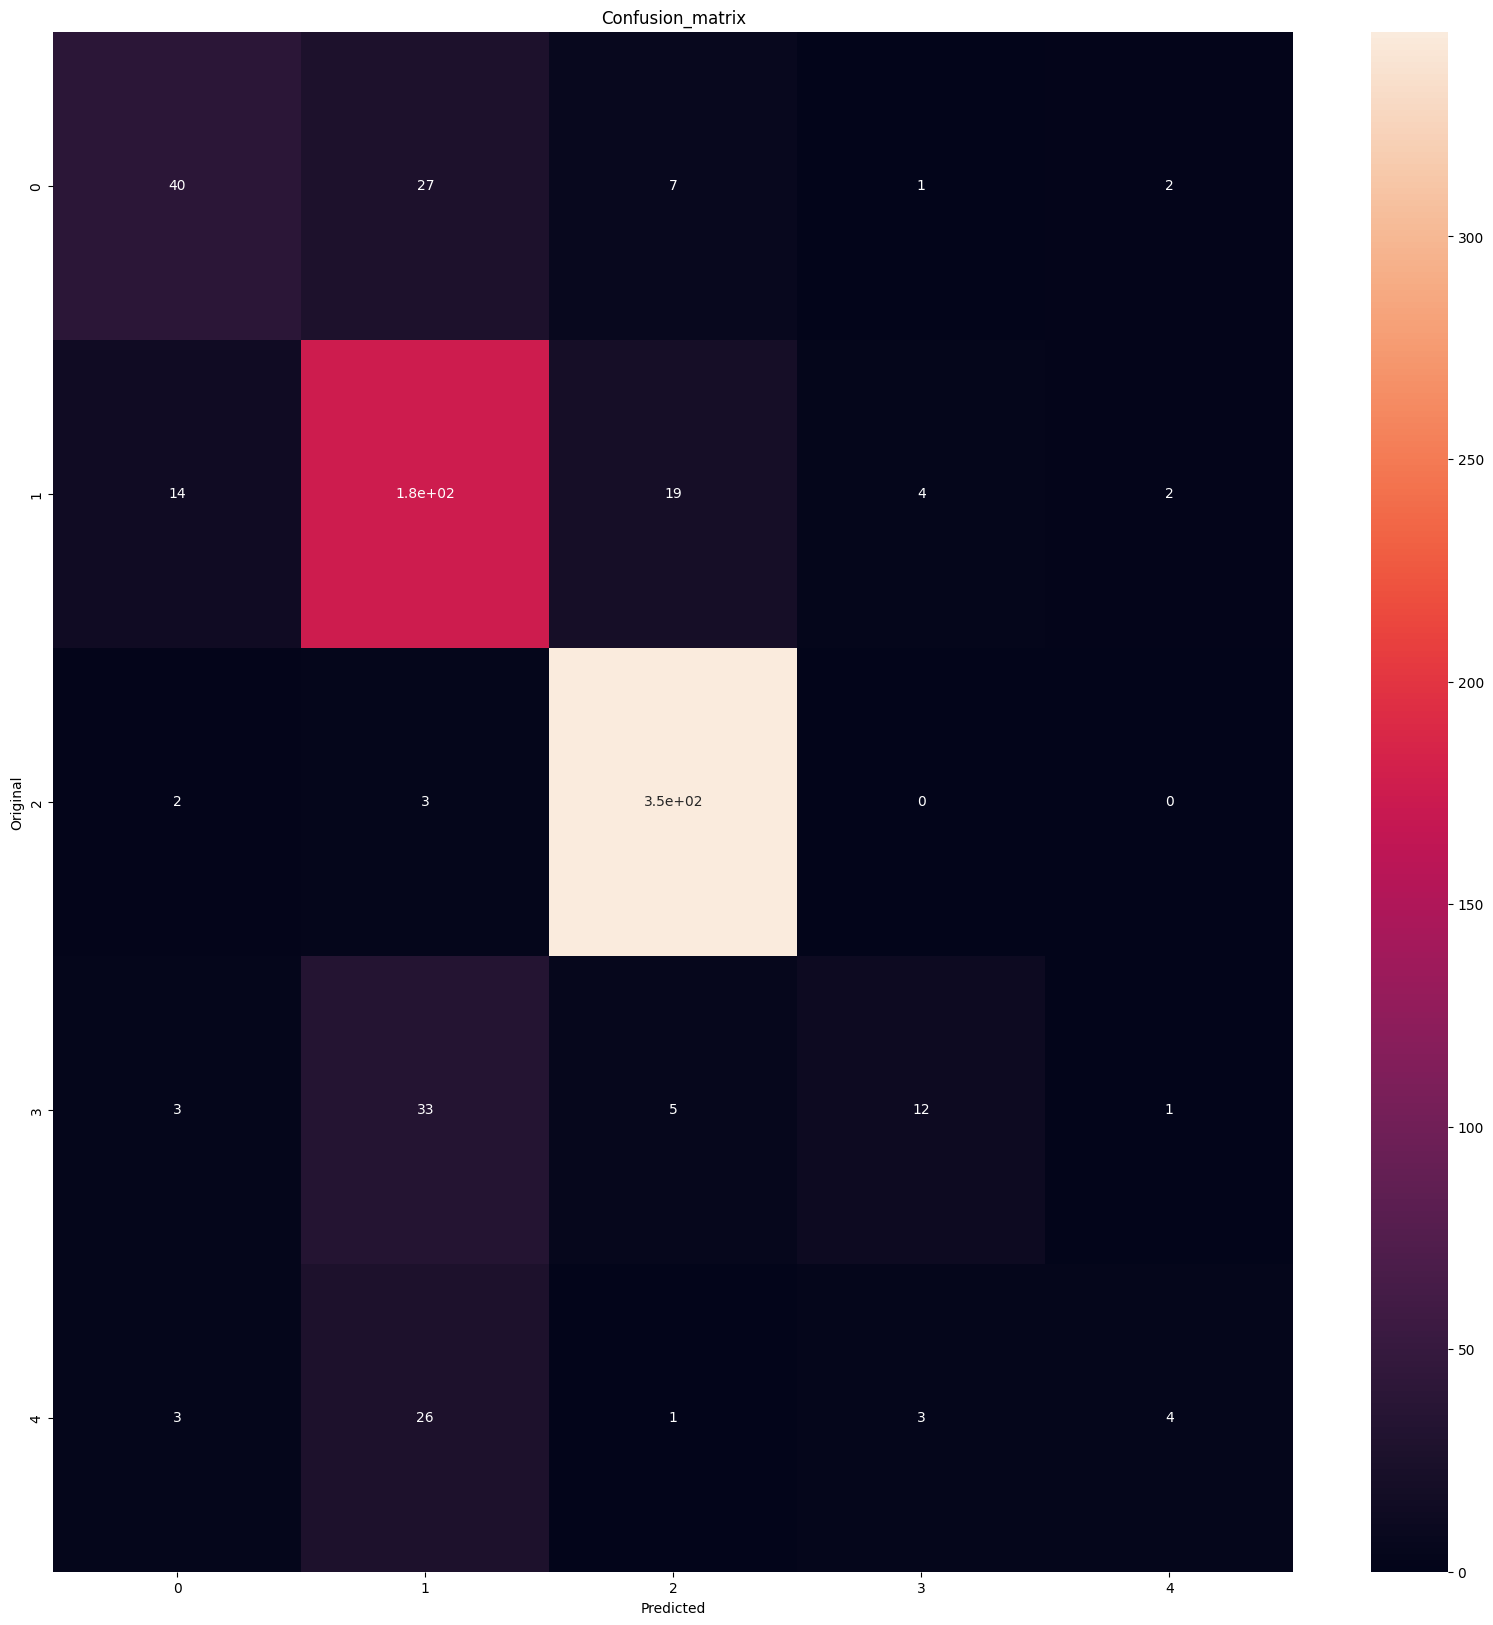

In [29]:
plt.figure(figsize = (20,20))
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Original')
ax.set_title('Confusion_matrix')

In [30]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

                precision    recall  f1-score   support

          Mild       0.65      0.52      0.58        77
      Moderate       0.66      0.82      0.73       214
         No_DR       0.92      0.99      0.95       351
Proliferate_DR       0.60      0.22      0.32        54
        Severe       0.44      0.11      0.17        37

      accuracy                           0.79       733
     macro avg       0.65      0.53      0.55       733
  weighted avg       0.77      0.79      0.76       733

